<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Aprendizaje Automático Supervisado</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el cuarto práctico del proyecto, correspondiente a la materia Aprendizaje Automático Supervisado. El objetivo consiste en profundizar en la aplicación de métodos de aprendizaje supervisado aprendidos en el curso, así como también en métodos de _ensemble learning_. Esto, siempre a través de experimentos reproducibles y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

A los fines de este práctico, consideraremos el problema original de nuestro proyecto, el cual consiste en un problema de clasificación múltiple con datos etiquetados. Nuevamente, al igual que en el práctico anterior, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [8]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import utils
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle, resample
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc
from sklearn import linear_model
from sklearn import ensemble #RandomForestClasifier, VotingClassifier
from sklearn import svm #LinearSVC, SVC
from sklearn import neural_network
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

np.random.seed(0)  # Para mayor determinismo

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Aprendizaje Automático Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes. La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos, prácticamente iguales a los del práctico anterior.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.
En esta etapa, nuevamente, pueden adicionar los atributos que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, una que represente los aparatos tecnológicos.

#### 3. Análisis del Balance de Clases

¿Cómo luce el balance de clases? ¿Tomarán alguna decisión al respecto?

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies. Analizar en qué casos resulta pertinente descartar la k-ésima dummie de cada categoría.

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Del siguiente punto en adelante, **deberán resolver para el dataset que consideren más apropiado**, en base a los resultados obtenidos en el práctico anterior.

#### 6. Creación de Nuevos Atributos

Si lo creen pertinente, pueden agregar nuevos atributos, calculados a partir de los datos preexistentes. Por ejemplo, tasa de dependencia al cuadrado, años de escolaridad al cuadrado, tasa de dependencia por edad de la persona jefa de hogar o por la edad promedio del hogar, etc.

#### 7. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización, considerando los nuevos modelos propuestos?

Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 8. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Clasificación de Aprendizaje Automático Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación **para el dataset seleccionado**, utilizando la librería Scikit-Learn (o la que consideren apropiada):

1. Support Vector Machines (SVM), probando clasificadores con distintos kernels.
2. Random Forest, utilizando parámetros de normalización cuando lo crean adecuado.
3. Red neuronal.

Para cada uno de ellos, se pide responder las siguientes consignas:
- Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?

De estos tres modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Finalmente, **combinar modelos en un clasificador por votos** (pueden implementar VotingClassifier, del módulo de ensemble).

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, **para el modelo selecionado**:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros (fine tuning).
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
    + Accuracy o exactitud
    + Reporte de clasificación
    + Confusion matrix o matriz de confusión (graficar como heatmap)
    + Curva ROC y área bajo la curva (AUC).
- Es apropiado utilizar la métrica **acuracy o exactitud** como medida de performance de nuestro modelo, de acuerdo a los datos con los que contamos? Por qué?

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Además, deberán sintetizar las principales conclusiones de éste y el anterior práctico en un PPT (dataset utilizado para entrenar el modelo, modelo más apropiado, selección de hiperparámetros y métricas calculadas).

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [3]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://raw.githubusercontent.com/solujan/MentoriaDiploDatos/master/dataset_fields_updated.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields.head(5)

,Variable_name,Variable_description
0,monthly_rent,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [4]:
import clean

clean_ds = clean.clean_datadrame(_ds)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']
Cantidad de familias sin caracteristicas comunes:  19
Cantidad de familias sin caracteristicas comunes:  4
Total Features:  2 objetos + 120 numerical = 122 features


In [6]:
clean_ds.to_csv("cleaned.csv")

In [11]:
clean_ds = pd.read_csv("cleaned.csv")

### 3. Análisis de Balance de Clases

Evaluar el balance de clases. Dejar plasmadas las decisiones que tomen al respecto.

In [12]:
clean_ds.Target.value_counts()

4    5953
2    1597
3    1189
1     755
Name: Target, dtype: int64

#### 3.1 Remuestreo a la clase más pequeña

Lo primero que vamos a hacer es probar con el remuestreo (resample), lo que vamos a hacer es agrandar la clase que vemos que tiene menos valores para que se parezca en tamaño a la otra clase. 

In [13]:
df_upsampled = utils.df_upsample(clean_ds, "Target")
df_upsampled.Target.value_counts()

4    5953
3    5953
2    5953
1    5953
Name: Target, dtype: int64

#### 3.2 Remuestreo a la clase más pequeña


In [14]:
df_downsampled = utils.df_downsample(clean_ds, "Target")
df_downsampled.Target.value_counts()

3    755
1    755
4    755
2    755
Name: Target, dtype: int64

### 4. Multicolinealidad Exacta y Variables Dummies

Decisiones respecto a las variables con multicolinealidad perfecta.

In [9]:
clean_ds["multicolinealidad"] = clean_ds.epared1 + clean_ds.epared2 
corr = clean_ds[["multicolinealidad", "epared3"]].corr()
corr.multicolinealidad.sort_values()

epared3             -1.0
multicolinealidad    1.0
Name: multicolinealidad, dtype: float64

Es evidente que hay multicolinealidad, entre estas tres variables que probamos. 

*¿Qué implicancia tiene esto en modelos lineales?*
El problema es que esto les añade mayor inestabilidad a nuestros valores porque los fuerzan más hacia un mismo lado, lo cual hace que nos de valores más sesgados.


¿Cómo solucionamos esto? 

- Regresión Ridge: Mecanicamente se reduce la interrelacion de las variables agregando una constante cualquiera a las varianzas de dichas variables.
- Eliminar predictores altamente correlacionados del modelo. Si tiene dos o más factores altamente correlacionados, elimine uno del modelo
- Analisis de componentes principales

### 5. Clasificación a Nivel Hogar o a Nivel Individuo

En este punto, deberán elegir si trabajar el dataset por individuo o por hogar.

En caso de elegir hacerlo por hogar, crear un nuevo dataset, `_ds_hogar`, manteniendo únicamente los individuos jefe de hogar (```parentesco1 == 1```) y los atributos que se repitan por hogar. Para aquellos atributos individuales, crear medidas sintéticas por hogar relevantes (suma, promedio simple, promedio ponderado, máximo, mínimo, etc.).

Por ejemplo, para la escolaridad, mantendría la de la persona jefa de hogar y crearía otra (u otras) que indiquen la escolaridad promedio o la escolaridad promedio por adulto.

In [10]:
_ds_individuo = _ds
_ds_hogar = _ds[_ds['parentesco1'] == 1]
_ds_hogar.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,4
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,NaN,0,1,2,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,4


### 6. Creación de Nuevos Atributos

Agregar nuevos atributos, calculados a partir de los datos originales, si creen que pueden ser útiles.

### 7. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

In [15]:
#min_max_scaler = preprocessing.MinMaxScaler()
#standard_scaler = preprocessing.StandardScaler()

def normalizar(df, scaler):
    fields = ['monthly_rent','hacdor','rooms','hogar_nin','hogar_adul','qmobilephone','hogar_mayor','v18q1','r4h1','r4h2','r4m1','r4m2','tamhog','tamviv','escolari','bedrooms','overcrowding','age']
    for col in fields:
        df[col] = scaler.fit_transform(df[[col]])
    return df

### 8. Mezca Aleatória y División en Train/Test

Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

In [16]:
def train_test_split_shuffle(dataframe):
    y = dataframe.Target
    dataframe.drop(columns=["Id","idhogar", "Target"], inplace=True)
    X = dataframe
    return train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [17]:
minmax = preprocessing.MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split_shuffle(normalizar(df_downsampled, minmax))

## II. Aplicación de Modelos de Clasificación

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para el dataset seleccionado, ya sea `_ds_individuo` o `_ds_hogar`.

### 1. Support Vector Machines

A continuación se aplicará un clasificador SVM.

In [14]:
# Algunos kernels son: "rbf","sigmoid","poly"

model = svm.SVC(kernel="sigmoid", random_state=0, class_weight=None)
model.fit(X_train, y_train)

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.44
Exactitud del algoritmo para conjunto de validación: 0.44


### 2. Random Forest

A continuación se aplicará un Random Forest para clasificar nuestro dataset.

In [16]:
model = ensemble.RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [17]:
y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 1.00
Exactitud del algoritmo para conjunto de validación: 0.79


### 3. Neural Network

A continuación se entrenará una red neuronal para clasificar el dataset. Pueden usar otra librería si lo desean, por ejemplo, Keras.

In [18]:
model = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=5000)
model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.60
Exactitud del algoritmo para conjunto de validación: 0.50


In [15]:
import tensorflow as tf

batch_size = 32
# TODO shuffle the train dataset!
train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values)).batch(batch_size)

In [17]:
tf.keras.backend.clear_session()

hidden_layer_size = 64

# Add one input and one embedding for each embedded column
embedding_layers = []
inputs = []
for embedded_col, max_value in embedded_columns.items():
    input_layer = layers.Input(shape=(1,), name=embedded_col)
    inputs.append(input_layer)
    # Define the embedding layer
    embedding_size = int(max_value / 4)
    embedding_layers.append(
        tf.squeeze(layers.Embedding(input_dim=max_value, output_dim=embedding_size)(input_layer), axis=-2))
    print('Adding embedding of size {} for layer {}'.format(embedding_size, embedded_col))

# Add the direct features already calculated
direct_features_input = layers.Input(shape=direct_features_input_shape, name='direct_features')
inputs.append(direct_features_input)
    
# Concatenate everything together
features = layers.concatenate(embedding_layers + [direct_features_input])

dense1 = layers.Dense(hidden_layer_size, activation='relu')(features)
output_layer = layers.Dense(nlabels, activation='softmax')(dense1)

model = models.Model(inputs=inputs, outputs=output_layer)

NameError: name 'embedded_columns' is not defined

In [20]:
X_train.head()[["age", "rooms"]]

,age,rooms
9217,0.175258,0.6
9075,0.175258,0.2
2166,0.123711,0.5
7167,0.103093,0.3
8421,0.082474,0.4


In [ ]:
# Librería Keras
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=4, input_dim=X_train[["age", "rooms"]].shape[1], activation='relu'),
  tf.keras.layers.Dense(4, activation = "softmax"),
])
#model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(0.1), metrics=['accuracy'])
model.compile(optimizer="adam",
                loss='categorical_crossentropy',
                metrics=['accuracy'])

dataset = tf.data.Dataset.from_tensor_slices((X_train[["age", "rooms"]].values, y_train.values))

train_dataset = dataset.shuffle(len(X_train)).batch(1)

history = model.fit(train_dataset, epochs=10)

# model = Sequential()
# model.add(Dense())
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
#               metrics=['accuracy'])
# model.fit(X_train, Y_train, batch_size=128,
#           epochs=2, verbose=1, validation_data=(X_val, Y_val))



Epoch 1/10


Para mayor información, consultar los siguientes links:
- https://keras.io/optimizers/
- https://keras.io/losses/

In [24]:
# Se calcula la exactitud para ambos conjuntos, train y test:

dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

test_dataset = dataset.shuffle(len(X_test)).batch(1)

test_loss, test_accuracy = model.evaluate(test_dataset)
print('Accuracy on test', test_accuracy)


604/604 [==============================] - 1s 2ms/step - loss: -60536.8921 - accuracy: 0.2351
Accuracy on test 0.23509933


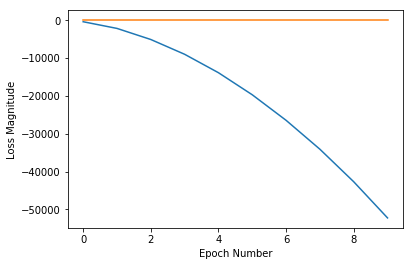

In [27]:
import matplotlib.pyplot as plt

plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

### 4. Clasificador por Votos

In [18]:
# Implementar VotingClassifier con los modelos que crean pertinentes
clf1 = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial',
                           random_state=1)
clf2 = ensemble.RandomForestClassifier(n_estimators=50, random_state=1)

clf = ensemble.VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2)], voting='hard')

clf.fit(X_train, y_train)



/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                      

In [20]:
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.73
Exactitud del algoritmo para conjunto de validación: 0.66


### 5. Selección del Modelo

#### 5.1. Selección y Descripción de Hipótesis

Describir el problema y la hipótesis del modelo.

#### 5.2. Selección de Regularizador

 ¿Utilizaron algún regularizador?¿Cuál?

#### 5.3. Selección de Función de Costo

¿Cuál fue la función de costo utilizada?

#### 5.4. Justificación de las Selecciones

A continuación, se justifican las elecciones previas.

### 6. Selección de Parámetros y Métricas Sobre el Conjunto de Evaluación

Para la selección de hiperparámetros, pueden utilizar *GridSearch*. Además, deben calcular las métricas solicitadas.

In [ ]:
# Para la búsqueda de los mejores parámetros

exploring_params = {
        'param1': [], # Diccionario de parámetros y valores a explorar
        'param1': []
        }

model = # Especificar modelo
n_cross_val =   # Seleccionar folds
scoring = 'roc_auc'
model = GridSearchCV(model, exploring_params, cv=n_cross_val, scoring=scoring)
    model.fit(X_train, y_train)
    
model.fit(X_train, y_train)

print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print()
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score'])
print()
print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred), end="\n\n")

print("================================================", end="\n\n")

In [ ]:
# Las métricas solicitadas son: accuracy_score, confusion_matrix, classification_report, roc_curve, auc